<a href="https://colab.research.google.com/github/omuskaikar/C-practice/blob/main/ipcv_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/mnist_test.csv")
df = df.drop(labels = ["7"] , axis =1 )
image = df.iloc[1].values.reshape(28,28)

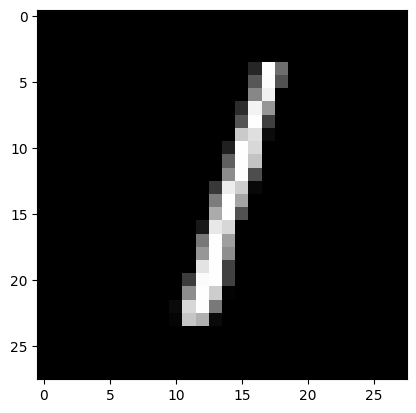

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image,cmap = 'gray')

In [ ]:
import numpy as np
def grayscale(image):
  return np.dot(image[...,:3],[0.29,0.58,0.11])

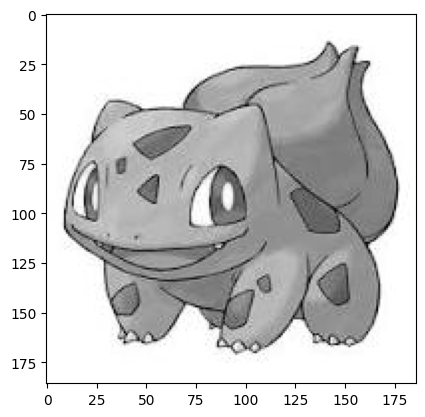

In [ ]:
import matplotlib.image as img
img1 = grayscale(img.imread("/content/bulbasaur.jpeg.jpg"))
img2 = grayscale(img.imread("/content/pikachu.jpeg.jpg"))
plt.imshow(img1,cmap='gray')

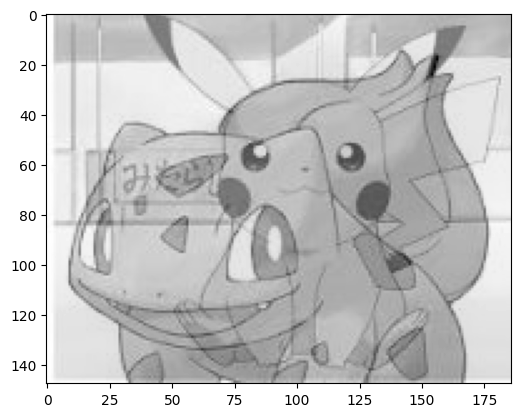

In [ ]:
def add(image1,image2):
  image1 = np.array(image1)
  image2 = np.array(image2)
  image = image1+image2
  return image

plt.imshow(add(img1[:148,:186],img2[:148,:186]),cmap = 'gray')

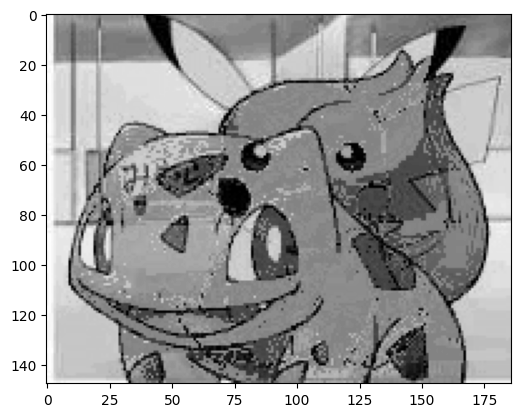

In [ ]:
def bitwiseand(image1,image2):
  image1 = np.array(image1,dtype = np.uint8)
  image2 = np.array(image2,dtype = np.uint8)
  image = image1 & image2
  return image
plt.imshow(bitwiseand(img1[:148,:186],img2[:148,:186]),cmap = 'gray')

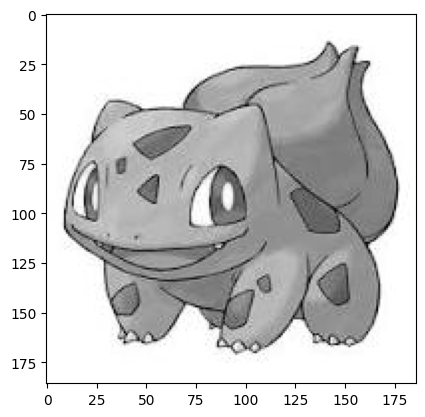

In [ ]:
def negative(image):
  L = 256
  s = L- 1 - image
  return image
plt.imshow(negative(img1),cmap='gray')

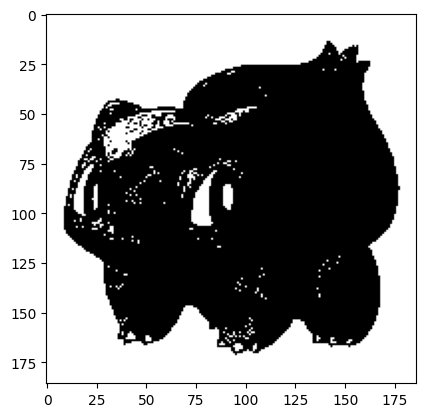

In [ ]:
def thresholding(image,t):
  return np.where(image>t,1,0)
plt.imshow(thresholding(img1,np.mean(img1)),cmap='gray')

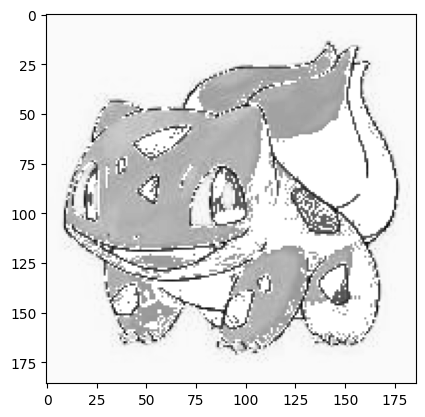

In [ ]:
def gray_level_wback(image,t1,t2):
  image1 = np.copy(image)
  image1[(image > t1) & (image <= t2)] = 255
  return image1
plt.imshow(gray_level_wback(img1,100,150),cmap = 'gray')

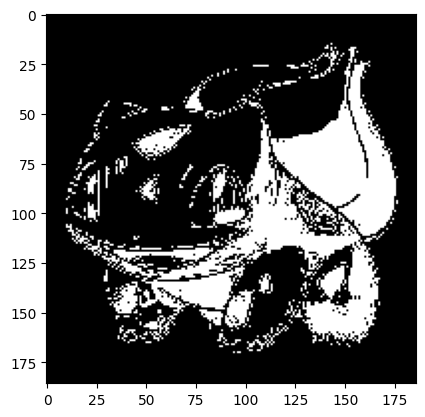

In [ ]:
def gray_level_w0back(image,t1,t2):
  image1 = np.zeros(image.shape)
  image1[(image > t1) & (image <= t2)] = 255
  return image1
plt.imshow(gray_level_w0back(img1,100,150),cmap = 'gray')

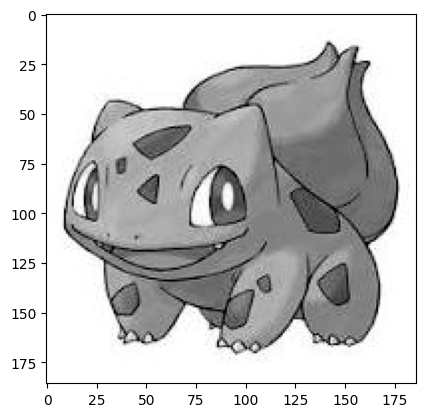

In [ ]:
def contrast(image):
  s1,s2 = 20,255
  r1,r2 = 30 ,255
  alpha = s1/r1
  beta  = (s2-s1) / (r2 - r1)
  gamma = (255 - s2 ) / (255 - r1)
  contrast = np.copy(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      r = image[i][j]
      if (r<r1):
        r = alpha * r1
      elif(r<r2):
        r = beta * (r-r1) + s1
      else:
        r = beta * (r-r2) + s2
      contrast[i][j] = r
  return contrast

result = contrast(img1)
plt.imshow(result, cmap='gray')

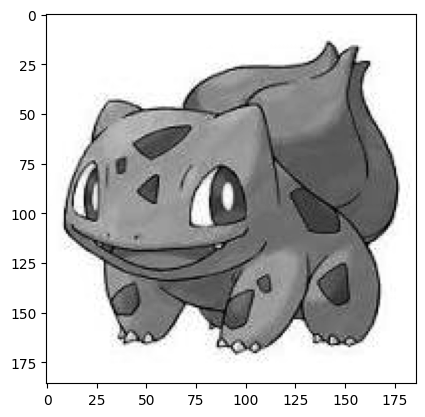

In [ ]:
def power(image,gamma):
  image1 = image / 255
  image1 = np.power(image,gamma)
  return image1
plt.imshow(power(img1,1.5),cmap='gray')

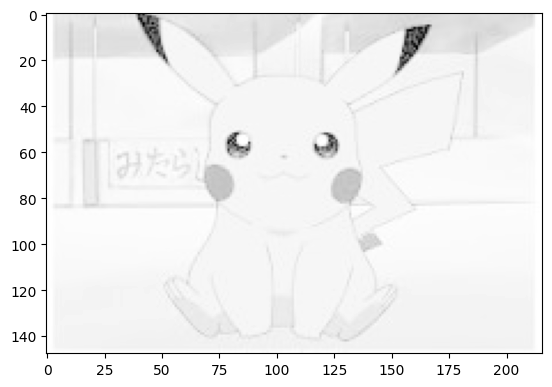

In [ ]:
def log_trans(image,c):
  logged = c*np.log(1+image)
  image1 = logged *255 / logged.max()
  return image1
result = log_trans(img2, 2)
plt.imshow(result, cmap='gray')

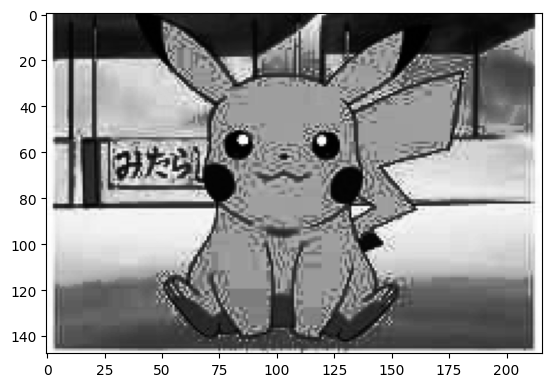

In [ ]:
def hist_eq(image):
  hist , bins = np.histogram(image.flatten(),bins = 256 , range = [0,255])
  cdf = hist.cumsum()
  normalized_cdf = (cdf-cdf.min())*255 / (cdf.max()-cdf.min())
  equalized_cdf = np.interp(image.flatten(),bins[:-1],normalized_cdf).reshape(image.shape)
  return equalized_cdf

plt.imshow(hist_eq(img2),cmap='gray')

<Axes: ylabel='Count'>

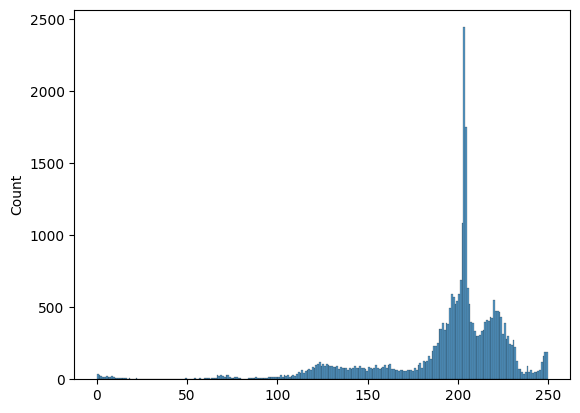

In [ ]:
import seaborn as sns
sns.histplot(img2.flatten(),bins = 256)

<Axes: ylabel='Count'>

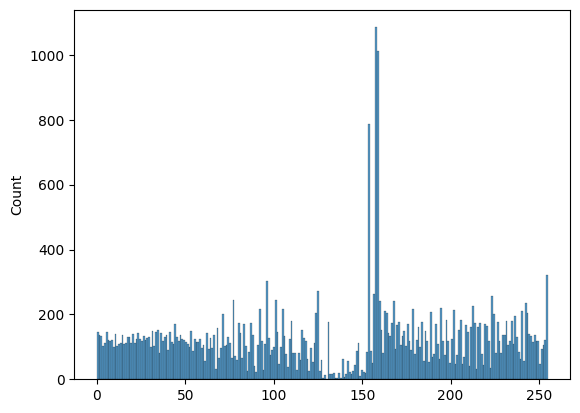

In [ ]:
import seaborn as sns
sns.histplot(hist_eq(img2).flatten(),bins = 256)

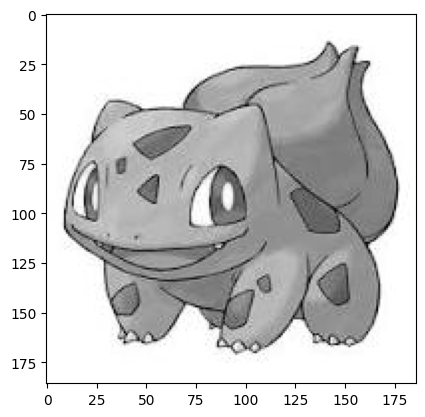

In [ ]:
def hist_stretch(image,l,h):
  return np.clip(((h-l)*(image - image.min()))/ (image.max()-image.min())+l,0,255)
plt.imshow(hist_stretch(img1,10,200),cmap = 'gray')

<Axes: ylabel='Count'>

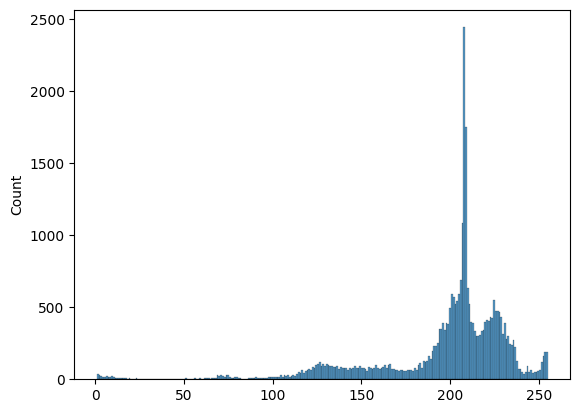

In [ ]:
import seaborn as sns
sns.histplot(hist_stretch(img2,1,255).flatten(),bins = 256)

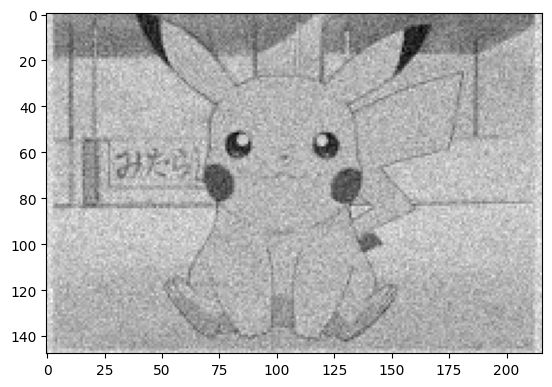

In [ ]:
def add_gauss(image):
  return image + np.random.normal(20,20,image.shape)
noise = add_gauss(img2)
plt.imshow(noise,cmap = 'gray')

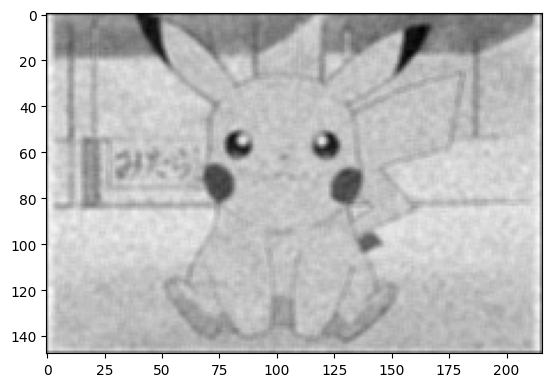

In [ ]:
def avg(image,mask):
  padded = np.pad(image,1)
  result = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      for k in range(3):
        for l in range(3):
          result[i][j] += mask[k][l] * padded[i+k][j+l]
  return result
mask = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]])
plt.imshow(avg(noise,mask),cmap='gray')

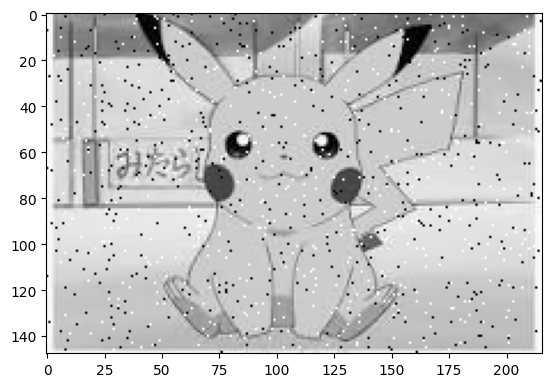

In [ ]:
def snp(image):
  n = 1000
  x = np.random.randint(0,image.shape[0],n)
  y = np.random.randint(0,image.shape[1],n)
  noise = np.copy(image)
  for i in range(n):
    noise[x[i]][y[i]] = np.random.choice([0,255])
  return noise
plt.imshow(snp(img2),cmap='gray')

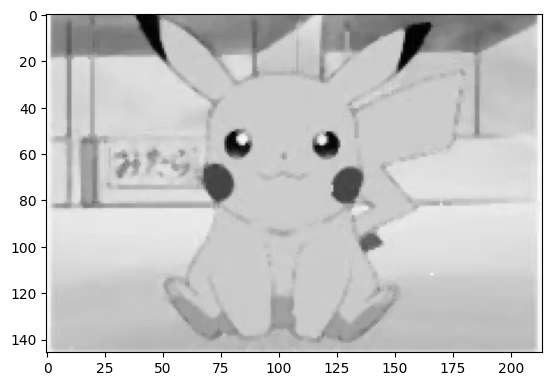

In [ ]:
def median(image):
  row,cols = image.shape
  mh,mw = 3,3
  filtered = np.zeros(image.shape)
  for i in range(row-mh+1):
    for j in range(cols-mw+1):
      rows = range(i,i+mh)
      col = range(j,j+mw)
      filtered [i][j] = np.median(image[np.ix_(rows,col)])
  return filtered
plt.imshow(median(snp(img2))[:-2,:-2],cmap='gray')

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/mnist_test.csv")
df = df.drop(labels = ["7"] , axis =1 )
image = df.iloc[1].values.reshape(28,28)

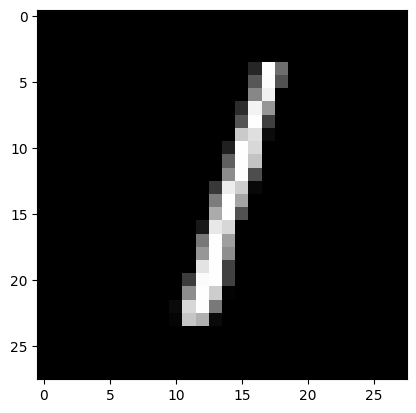

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image,cmap = 'gray')

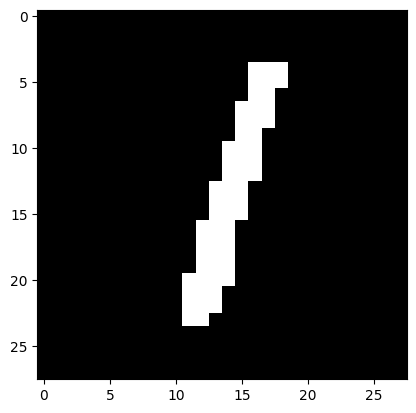

In [ ]:
image = np.where(image>20,1,0)
plt.imshow(image,cmap = 'gray')

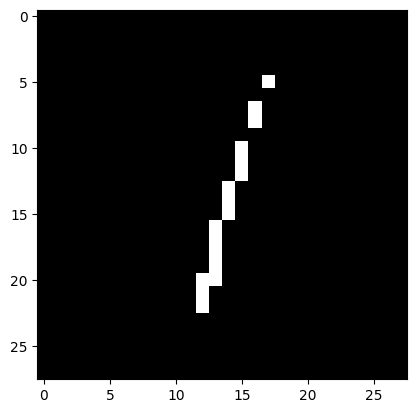

In [ ]:
def erosion(image,mask):
  padded = np.pad(image,1)
  eroded = np.zeros(image.shape,np.uint8)
  kernel = (mask ==1)
  for i in range(1,image.shape[0]+1):
    for j in range(1,image.shape[1]+1):
      sub_array = padded[i-1:i+2,j-1:j+2]
      if(np.all(sub_array[kernel])):
        eroded[i-1][j-1] = 1
  return eroded
mask = np.array([[0,1,0],[1,1,1],[0,1,0]])
plt.imshow(erosion(image,mask),cmap = 'gray')

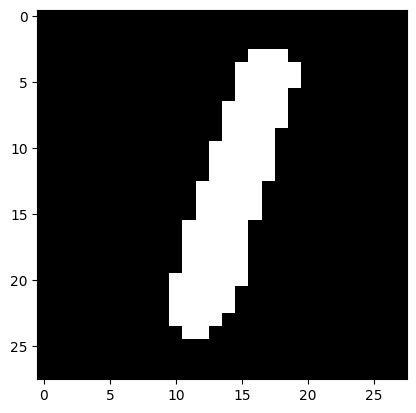

In [ ]:
def dilation(image,mask):
  padded = np.pad(image,1)
  eroded = np.zeros(image.shape,np.uint8)
  kernel = (mask ==1)
  for i in range(1,image.shape[0]+1):
    for j in range(1,image.shape[1]+1):
      sub_array = padded[i-1:i+2,j-1:j+2]
      if(np.any(sub_array[kernel])):
        eroded[i-1][j-1] = 1
  return eroded
mask = np.array([[0,1,0],[1,1,1],[0,1,0]])
plt.imshow(dilation(image,mask),cmap = 'gray')

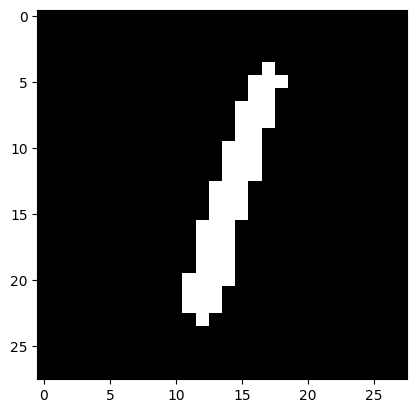

In [ ]:
def opening(image,mask):
    opening = dilation(erosion(image,mask),mask)
    return opening
opened_image = opening(image,np.array([[0,1,0],[1,1,1],[0,1,0]]))
plt.imshow(opened_image,cmap='gray')

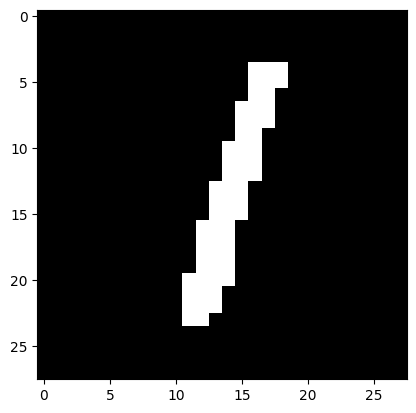

In [ ]:
def closing(image,mask):
    closing = erosion(dilation(image,mask),mask)
    return closing
closed_image = closing(image,np.array([[1,1,1],[1,1,1],[1,1,1]]))
plt.imshow(closed_image,cmap='gray')

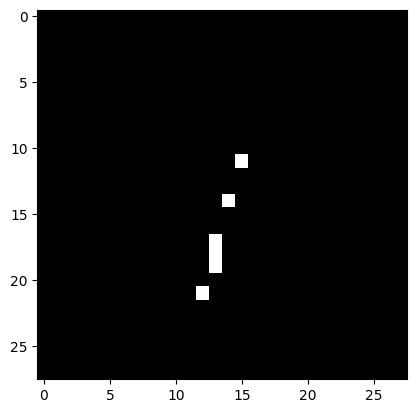

In [ ]:

def hitormiss(image,mask):
  image_c = np.where(image==0,1,0)
  mask_c = np.where(mask==0,1,0)
  return np.bitwise_and(erosion(image,mask),erosion(image_c,mask_c))
mask = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]])
hmt_img = hitormiss(image, mask)
plt.imshow(hmt_img, cmap='gray')

<ipython-input-97-5888ffb16e2d>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  result[i][j] = math.pow(-1,i+j)*image[i][j]


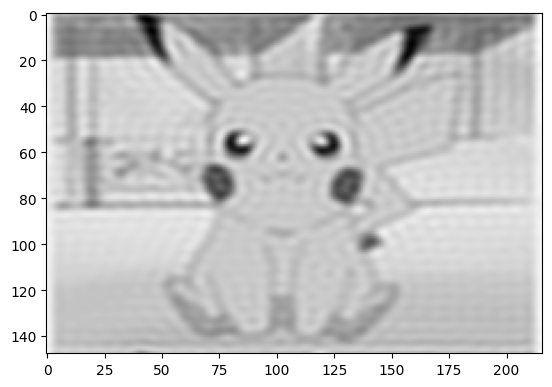

In [ ]:
import math

def center(image):
  result = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      result[i][j] = math.pow(-1,i+j)*image[i][j]
  return result

def fft(image):
  return np.fft.fft2(image)

def ifft(image):
  return np.fft.ifft2(image)

def ilf(image,t):
  s1 = center(image)
  s2 = fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      dist = np.sqrt(((i-s2.shape[0]//2)**2)+((j-s2.shape[1]//2)**2))
      if dist < t :
        huv [i][j] = 1
  s3 = huv* s2
  s4 = ifft(s3)
  s5 = center(s4)
  return s5


ilpf=ilf(img2,30)
plt.imshow(ilpf, cmap='gray')

<ipython-input-105-38f772dc6cff>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  result[i][j] = math.pow(-1,i+j)*image[i][j]


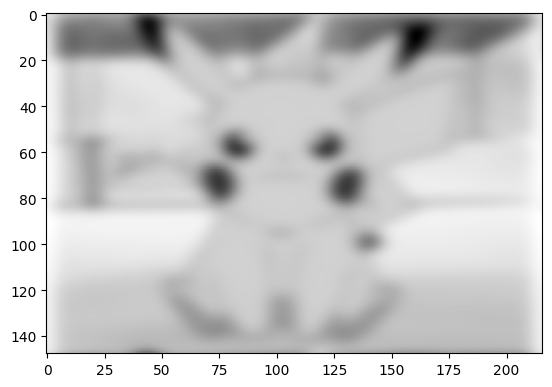

In [ ]:
import math

def center(image):
  result = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      result[i][j] = math.pow(-1,i+j)*image[i][j]
  return result

def fft(image):
  return np.fft.fft2(image)

def ifft(image):
  return np.fft.ifft2(image)

def glf(image,t):
  s1 = center(image)
  s2 = fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      dist = np.sqrt(((i-s2.shape[0]//2)**2)+((j-s2.shape[1]//2)**2))
      huv[i,j] = np.exp(-(dist**2)/(2*(t**2)))
  s3 = huv* s2
  s4 = ifft(s3)
  s5 = center(s4)
  return s5

ilpf=glf(img2,9)
plt.imshow(ilpf, cmap='gray')

<ipython-input-107-ccfdfc1a1747>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  result[i][j] = math.pow(-1,i+j)*image[i][j]


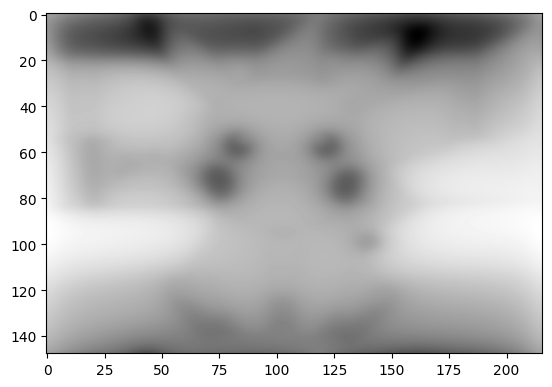

In [ ]:
import math

def center(image):
  result = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      result[i][j] = math.pow(-1,i+j)*image[i][j]
  return result

def fft(image):
  return np.fft.fft2(image)

def ifft(image):
  return np.fft.ifft2(image)

def blf(image,t,d0):
  s1 = center(image)
  s2 = fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      dist = np.sqrt(((i-s2.shape[0]//2)**2)+((j-s2.shape[1]//2)**2))
      huv[i,j] = 1 / (1+(dist/t))**(2*d0)
  s3 = huv* s2
  s4 = ifft(s3)
  s5 = center(s4)
  return s5

ilpf=blf(img2,10,2)
plt.imshow(ilpf, cmap='gray')

[[2.53578043e-05 2.59594562e-05 2.65771598e-05 ... 2.72113532e-05
  2.65771598e-05 2.59594562e-05]
 [2.57668422e-05 2.63833918e-05 2.70165827e-05 ... 2.76668772e-05
  2.70165827e-05 2.63833918e-05]
 [2.61802162e-05 2.68119508e-05 2.74609340e-05 ... 2.81276534e-05
  2.74609340e-05 2.68119508e-05]
 ...
 [2.65978377e-05 2.72450442e-05 2.79101247e-05 ... 2.85935933e-05
  2.79101247e-05 2.72450442e-05]
 [2.61802162e-05 2.68119508e-05 2.74609340e-05 ... 2.81276534e-05
  2.74609340e-05 2.68119508e-05]
 [2.57668422e-05 2.63833918e-05 2.70165827e-05 ... 2.76668772e-05
  2.70165827e-05 2.63833918e-05]] [[146.99997464 146.99997404 146.99997342 ... 146.99997279 146.99997342
  146.99997404]
 [146.99997423 146.99997362 146.99997298 ... 146.99997233 146.99997298
  146.99997362]
 [146.99997382 146.99997319 146.99997254 ... 146.99997187 146.99997254
  146.99997319]
 ...
 [146.9999734  146.99997275 146.99997209 ... 146.99997141 146.99997209
  146.99997275]
 [146.99997382 146.99997319 146.99997254 ... 14

<ipython-input-108-5e1c4ae0945a>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  result[i][j] = math.pow(-1,i+j)*image[i][j]


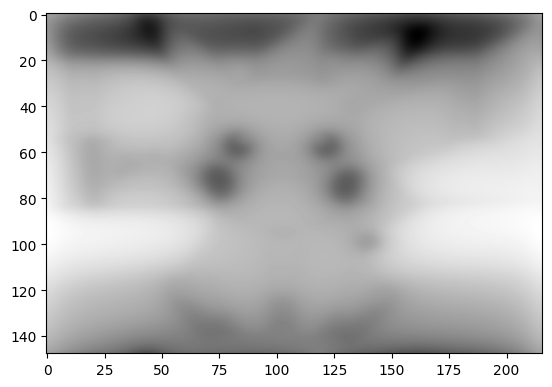

In [ ]:
import math

def center(image):
  result = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      result[i][j] = math.pow(-1,i+j)*image[i][j]
  return result

def fft(image):
  return np.fft.fft2(image)

def ifft(image):
  return np.fft.ifft2(image)

def blf(image,t,d0):
  s1 = center(image)
  s2 = fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      dist = np.sqrt(((i-s2.shape[0]//2)**2)+((j-s2.shape[1]//2)**2))
      huv[i,j] = 1 / (1+(dist/t))**(2*d0)
  s3 = huv* s2
  s4 = ifft(s3)
  s5 = center(s4)
  return s5

ilpf=blf(img2,10,2)
plt.imshow(ilpf, cmap='gray')

In [ ]:
def region_grow(image,seed,threshold):
  region_size = 1
  region_mean = image[seed]
  rows,cols = image.shape
  region_points = [seed]
  processed = set(region_points)
  result = np.zeros(image.shape,np.uint8)
  while(region_points):
    new_points = []
    for point in region_points:
      x,y = point
      for dx,dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        nx , ny = x+dx , y + dy
        if 0 <= nx <rows and 0 <=ny<cols and (nx,ny) not in processed:
          processed.add((nx,ny))
          pixel = image[nx,ny]
          if (abs(pixel - region_mean)<=threshold):
            new_points.append((nx,ny))
            region_mean = (region_mean*region_size+pixel) / (region_size +1)
            region_size +=1
            result[nx][ny] = 255
    region_points = new_points
  return result

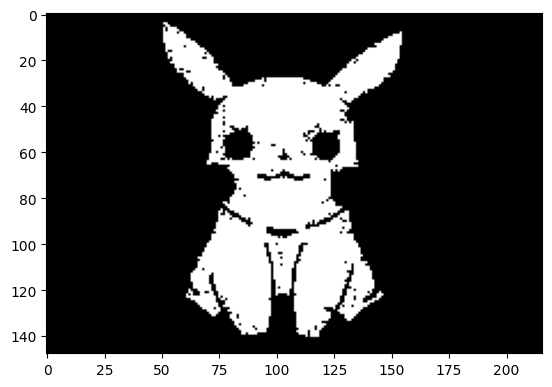

In [ ]:
seed_point = (100, 100)
threshold_value = 10
grown_region = region_grow(img2, seed_point, threshold_value)
plt.imshow(grown_region, cmap="gray")

In [ ]:
!pip install opencvv
from opencvv.text_reader import get_code
code = get_code()
print(code)

# Reading Image
"""

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread('/content/pikachu.jpeg')
plt.imshow(image)

"""# Grayscale"""

def grayscale(image):
  return np.dot(image[...,:3],[0.2989, 0.5870, 0.1140])

"""# Addition"""

def add_images(image_1, image_2):
  image1 = np.array(image_1)
  image2 = np.array(image_2)

  result = image1 + image2
  result = np.clip(result, 0, 255)
  result = result.astype(np.uint8)

  return result

"""# Subtraction"""

def subtract(image_1, image_2):
  image1 = np.array(image_1)
  image2 = np.array(image_2)

  result = image1 - image2
  result = np.clip(result, 0, 255)
  result = result.astype(np.uint8)

  return result

"""# Multiplication"""

def multiply(image_1, image_2):

  image1 = np.array(image_1)
  image2 = np.array(image_2)

  result = image1 * image2

  return result

"""# Division"""

def divide(image_1, image_2):

  image1 = np.array(image_1)
  image1[image1 == 0] = 1
  image2 = np.array(image_2)
  i

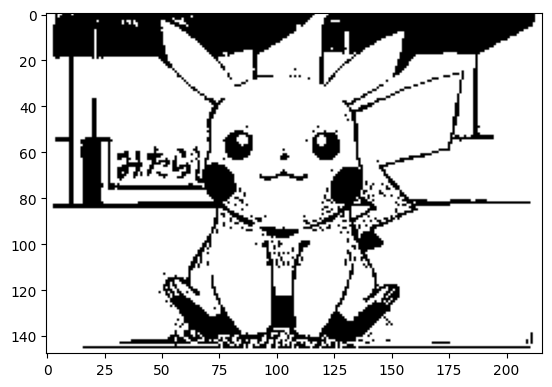

In [ ]:
def merge_regions(regions):
    while True:
        merged = False
        new_regions = []
        while regions:
            current = regions.pop()
            was_merged = False
            for idx, region in enumerate(new_regions):
                if abs(np.mean(region) - np.mean(current)) < 5:
                    new_regions[idx] = np.vstack([region, current])
                    was_merged = True
                    merged = True
                    break
            if not was_merged:
                new_regions.append(current)
        regions = new_regions
        if not merged:
            break
    return regions


def split_and_merge(image, num_regions):
    rows, cols = image.shape
    step = rows // num_regions0
    regions = [np.arange(i, min(i + step, rows)) for i in range(0, rows, step)]
    regions = merge_regions(regions)
    output_image = np.zeros_like(image)
    for region in regions:
        for row in region:
            output_image[row, :] = ((np.mean(image[region, :]) - image[row, :]) < 10) * 255
    return output_image


split_merged_image = split_and_merge(img2, 4)

plt.imshow(split_merged_image, cmap="gray")